# Walking through directory, calculating PSNR/SSIM

C:\Users\neuro-ws\AppData\Local\Temp\ipykernel_29912\1165773002.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value = ssim(hr_image, resized_img, multichannel=True)


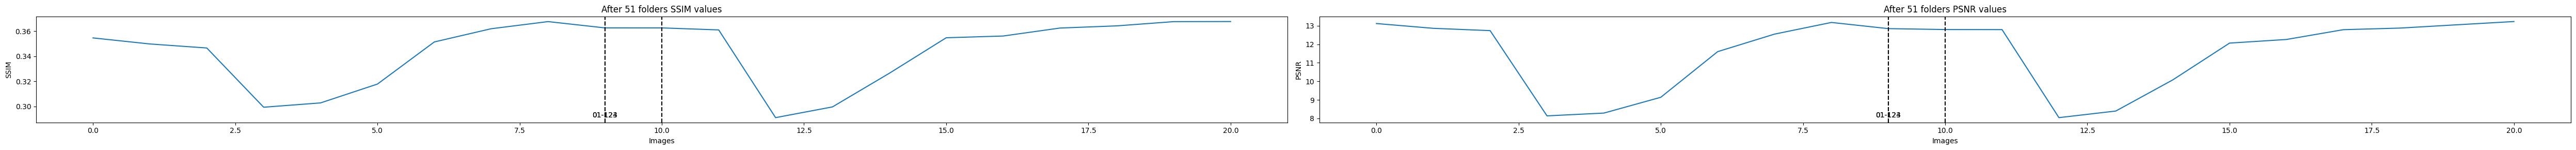

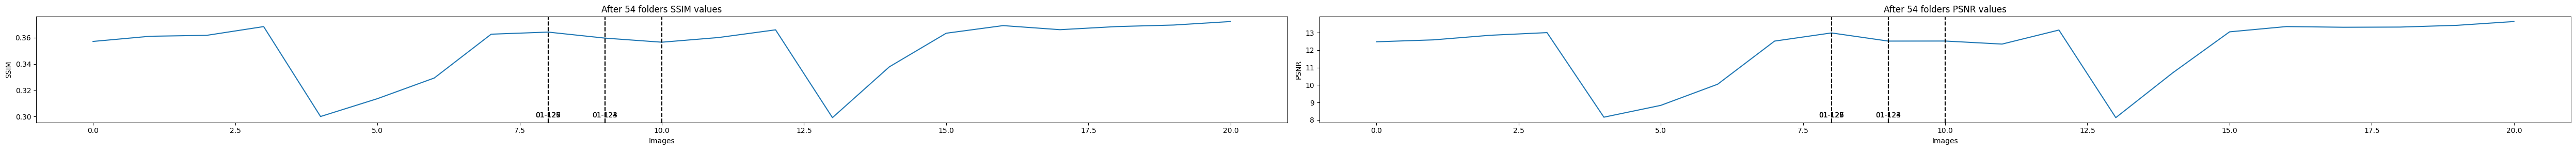

KeyboardInterrupt: 

In [12]:
import os
import cv2
import numpy as np
import time
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt

X = 'c:\\Users\\neuro-ws\\data_local\\MED_HR_LOCAL'

# Load image from directory X
hr_name = 'B-L-21_04_1485.bmp'  
hr_path = os.path.join(X, hr_name)

hr_image = cv2.imread(hr_path)

ssim_list = []
psnr_list = []
image_names = []
folder_names = []

start_time = time.time()

folder_changes = []
n_images_per_folder = 0
folder_counter = 1

# Traverse through directory Y
for subdir, dirs, files in os.walk('c:\\Users\\neuro-ws\\data_local\\samples_gray_roi'):
    if time.time() - start_time > 4500:
        break
    folder_names.append(os.path.basename(subdir)) # store folder name
    for i, file in enumerate(files):
        # Break after 45 seconds
        if time.time() - start_time > 4500:
            break

        if i % 45 == 0: 
            image_path = os.path.join(subdir, file)
            loaded_img = cv2.imread(image_path)
            resized_img = cv2.resize(loaded_img, (hr_image.shape[1], hr_image.shape[0]), interpolation=cv2.INTER_CUBIC)
            ssim_value = ssim(hr_image, resized_img, multichannel=True)
            psnr_value = psnr(hr_image, resized_img)
            ssim_list.append(ssim_value)
            psnr_list.append(psnr_value)
            image_names.append(file)
            n_images_per_folder += 1

    folder_changes.append(n_images_per_folder)

    if folder_counter % 3 == 0:
            # Plotting code updated with text labels
            plt.figure(figsize=(50, 3))

            plt.subplot(1, 2, 1)
            plt.plot(range(len(image_names)), ssim_list)
            plt.title(f"SSIM values after {folder_counter} folders")
            plt.xlabel("Images")
            plt.ylabel("SSIM")
            for i, xc in enumerate(folder_changes):
                plt.axvline(x=xc, color='k', linestyle='--')
                if i != 0:
                    mid_point = (folder_changes[i] + folder_changes[i-1]) // 2
                    plt.text(mid_point, min(ssim_list), folder_names[i], ha='center')  # Adjust as needed

            plt.subplot(1, 2, 2)
            plt.plot(range(len(image_names)), psnr_list)
            plt.title(f"PSNR values after {folder_counter} folders")
            plt.xlabel("Images")
            plt.ylabel("PSNR")
            for i, xc in enumerate(folder_changes):
                plt.axvline(x=xc, color='k', linestyle='--')
                if i != 0:
                    mid_point = (folder_changes[i] + folder_changes[i-1]) // 2
                    plt.text(mid_point, min(psnr_list), folder_names[i], ha='center')  # Adjust as needed
                
            plt.tight_layout()
            plt.show()

    folder_counter += 1

plt.figure(figsize=(100, 5))

plt.subplot(1, 2, 1)
plt.plot(range(len(image_names)), ssim_list)
plt.title("Final SSIM values")
plt.xlabel("Images")
plt.ylabel("SSIM")
for i, xc in enumerate(folder_changes):
    plt.axvline(x=xc, color='k', linestyle='--')
    if i != 0:
        mid_point = (folder_changes[i] + folder_changes[i-1]) // 2
        plt.text(mid_point, min(ssim_list), folder_names[i], ha='center')  # Adjust as needed

plt.subplot(1, 2, 2)
plt.plot(range(len(image_names)), psnr_list)
plt.title("Final PSNR values")
plt.xlabel("Images")
plt.ylabel("PSNR")
for i, xc in enumerate(folder_changes):
    plt.axvline(x=xc, color='k', linestyle='--')
    if i != 0:
        mid_point = (folder_changes[i] + folder_changes[i-1]) // 2
        plt.text(mid_point, min(psnr_list), folder_names[i], ha='center')  # Adjust as needed

plt.tight_layout()
plt.show()


1
2


C:\Users\neuro-ws\AppData\Local\Temp\ipykernel_29912\3799412993.py:72: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value = ssim(hr_image, resized_img, multichannel=True)


3


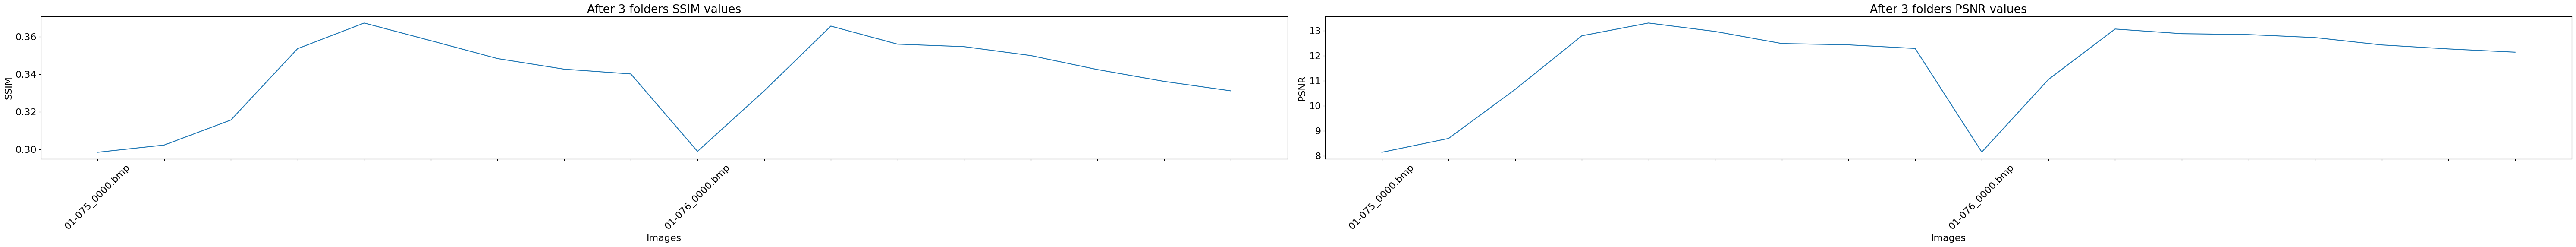

4


C:\Users\neuro-ws\AppData\Local\Temp\ipykernel_29912\3799412993.py:72: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value = ssim(hr_image, resized_img, multichannel=True)


KeyboardInterrupt: 

In [45]:
import os
import cv2
import numpy as np
import time
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt
from collections import deque

X = 'c:\\Users\\neuro-ws\\data_local\\MED_HR_LOCAL'

# Load image from directory X
hr_name = 'B-L-21_04_1485.bmp'
hr_path = os.path.join(X, hr_name)

hr_image = cv2.imread(hr_path)

start_time = time.time()

folder_counter = 0
max_folder_count = 21  # Max folder's data to keep in memory for plotting

# Lists to store data
ssim_list = []
psnr_list = []
image_names = []
folder_names = []
images_counts = []

plt.rcParams['font.size'] = 16

def plot_values(title_prefix):
    plt.figure(figsize=(60, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(len(image_names)), ssim_list)
    plt.title(f"{title_prefix} SSIM values")
    plt.xlabel("Images")
    plt.ylabel("SSIM")
    plt.xticks(range(len(image_names)), image_names, rotation = 45, fontsize=16)

    plt.subplot(1, 2, 2)
    plt.plot(range(len(image_names)), psnr_list)
    plt.title(f"{title_prefix} PSNR values")
    plt.xlabel("Images")
    plt.ylabel("PSNR")
    plt.xticks(range(len(image_names)), image_names, rotation = 45, fontsize=16)

    plt.tight_layout()
    plt.show()

# Traverse through directory Y
for subdir, dirs, files in os.walk('c:\\Users\\neuro-ws\\data_local\\samples_gray_roi'):
    if time.time() - start_time > 4500:
        break

    folder_names.append(os.path.basename(subdir))

    image_count = 0
    folder_counter += 1  # increase the folder counter
    for i, file in enumerate(files):
        if time.time() - start_time > 4500 or i % 48 != 0 and folder_counter <90:
            continue

        image_path = os.path.join(subdir, file)
        loaded_img = cv2.imread(image_path)
        resized_img = cv2.resize(
            loaded_img, (hr_image.shape[1], hr_image.shape[0]), interpolation=cv2.INTER_CUBIC
        )

        ssim_value = ssim(hr_image, resized_img, multichannel=True)
        ssim_list.append(ssim_value)

        psnr_value = psnr(hr_image, resized_img)
        psnr_list.append(psnr_value)

        # Append only the first image name of the folder
        if image_count == 0:
            image_names.append(file)
        else:
            image_names.append("")  # If it's not the first image, append an empty string

        image_count += 1

    images_counts.append(image_count)

    if folder_counter > max_folder_count:
        n_images_to_drop = images_counts.pop(0)  

        ssim_list = ssim_list[n_images_to_drop:]
        psnr_list = psnr_list[n_images_to_drop:]
        image_names = image_names[n_images_to_drop:]
        folder_names.pop(0)  

    if folder_counter % 3 == 0:
        plot_values(f"After {folder_counter} folders")

plot_values("Final")

# Define the plotting function with horizontal label orientation
def plot_values(title_prefix):
    plt.figure(figsize=(50, 4))

    plt.subplot(1, 2, 1)
    plt.plot(range(len(image_names)), ssim_list)
    plt.title(f"{title_prefix} SSIM values")
    plt.xlabel("Image per Folder")
    plt.ylabel("SSIM")
    plt.xticks(range(len(image_names)), image_names, labels = [image_names[0][:6]], rotation = 'horizontal', fontsize=14)

    plt.subplot(1, 2, 2)
    plt.plot(range(len(image_names)), psnr_list)
    plt.title(f"{title_prefix} PSNR values")
    plt.xlabel("Image per Folder")
    plt.ylabel("PSNR")
    plt.xticks(range(len(image_names)), image_names, fontsize=14)

    plt.tight_layout()
    plt.show()
